<a href="https://colab.research.google.com/github/bhutadaneha92/AgeNetWorthLinearRegression/blob/main/AgeNetWorthLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Topic- Estimate persons income by using age factor (Linear regression)
Steps-
1. import require liberaries
2. import model
3. Create dataset
4. split dataset
5. Train the model
6. Test the model
7. Plot the result

Coefficient [[6.43382564]]
Slope [-11.9303367]
Testig data 0.8751586450797275
Training data 0.8799909377220476


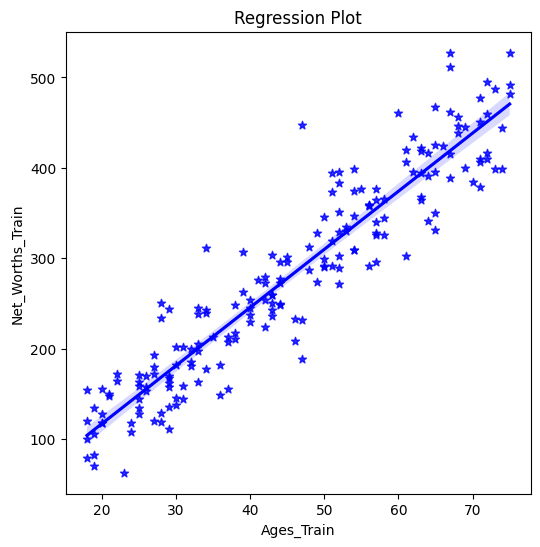

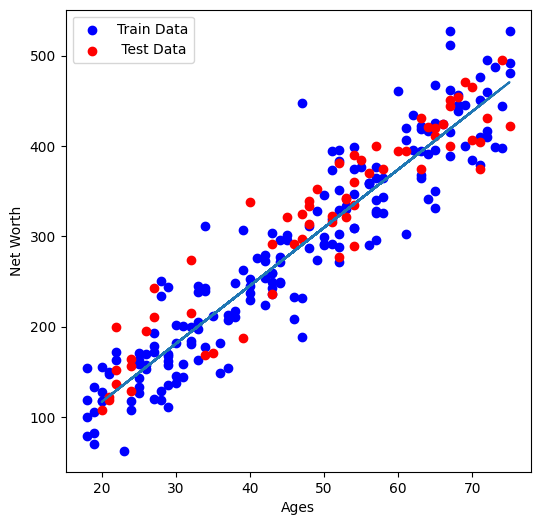

In [ ]:
import numpy    #Mathematical operations
import random   #Generate random data
import matplotlib.pyplot as plt #Visualization/Plot graph
import seaborn as sns #To plot graph (Advance over matplotlib)

#Function named studentReg for using linear regression model and training the model with given values
def studentReg(ages_train, net_worths_train):
  from sklearn.linear_model import LinearRegression
  reg = LinearRegression()
  reg.fit(ages_train, net_worths_train)   #fit the model to training data
  return reg

#random() function is used to generate random numbers in Python
#Seed is used in the generation of a pseudo-random encryption key.
#random.seed(42)
#Also seed function is used to generate same random numbers again and again and
#simplifies algorithm testing process.
numpy.random.seed(42)

#Create a data
ages = []   #create an empty list
#append 250 values of ages
for i in range(250):
  ages.append( random.randint(18,75) )  #generate random no between 18 to 75

#scale : [float or array_like]Standard Derivation of the distribution.
#Generating net_worth by multiplying with 6.25 taking it as slope
net_worths = [i * 6.25 + numpy.random.normal(scale=40.) for i in ages]

### need massage list into a 2d numpy array to get it to work in LinearRegression
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

#train_test_split is a function in Sklearn model selection for splitting data
#arrays into two subsets: for training data and for testing data.
#With this function, you don't need to divide the dataset manually.
from sklearn.model_selection import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths)

#Passing training data to my Linear regression model
reg = studentReg(ages_train, net_worths_train)

#Checking slope and intercept of the trained model
print("Coefficient",reg.coef_)
print("Slope",reg.intercept_)

#Calculating efficiency. It internally calculates y_pred again and gives the efficiency
print("Testig data",reg.score(ages_test, net_worths_test)) #R-squared method
print("Training data",reg.score(ages_train, net_worths_train))

#Plotting graph using seaborn.
plt.figure(figsize=(6,6))
#using regression plot from seaborn library to find out best fit line
sns.regplot(x=ages_train,y=net_worths_train, scatter =True, color = 'b', marker = "*")
plt.xlabel("Ages_Train")
plt.ylabel("Net_Worths_Train")
plt.title("Regression Plot")


#Scatter plot - It is use to plot datapoints on horizontal and vertical axis, to see how much one variable is affected by other variable
#Plotting graph using matplotlib.
plt.figure(figsize=(6,6))
plt.scatter(ages_train,net_worths_train, color = 'b', label = "Train Data")
plt.scatter(ages_test,net_worths_test, color = 'r', label = " Test Data")
plt.plot(ages_test,reg.predict(ages_test))
plt.xlabel("Ages")
plt.ylabel("Net Worth")
plt.legend(loc=2) #It will indicate the position of label
plt.show()
